# Определение закономерностей, влияющих на успех продаж видеоигр 

Заказчик - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Представлены данные до 2016 года. Необходимо спланировать кампанию на 2017-й.

**Цель исследования** - установить, какие игры лучше всего продаются и выявить закономерности

**Ход исследования**

1. Изучение данных.
2. Предобработка данных.
3. Анализ данных.
4. Проверка гипотезы.
5. Подготовка общего вывода.

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Вывод**

Всего 11 столбцов - 5 текстовых, 6 вещественных. Имеются пропуски в данных, у столбцов с датой релиза и оценкой критиков необходимо изменить тип данных. Возможны дубликаты. Названия столбцов необходимо привести к нижнему регистру.

## Предобработка данных

In [5]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# посчитаем количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data.sort_values('name', ascending=False, na_position='first').head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
9134,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


У двух игр есть информация только о годе, платформе и продажах. Можно их удалить.

In [8]:
data = data.dropna(subset=['name'])

In [9]:
data.sort_values('year_of_release', ascending=False, na_position='first').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [10]:
# посчитаем процент пропусков в дате релиза
data['year_of_release'].isna().sum() / data['year_of_release'].count() * 100

1.6358550231087325

Пропуски в дате релиза составляют около 1.6 %. Можно их удалить.

In [11]:
data = data.dropna(subset=['year_of_release'])

In [12]:
data.sort_values('critic_score', ascending=False, na_position='first').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Многие пропуски в трех столбцах совпадают. Скорее всего это неслучайные пропуски, поэтому необходимо обратится к источнику данных.

In [13]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [14]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


Кэмбриджский словарь утверждает, что абрревиатура tbd используется, когда что-то еще не решено или еще не известно. Соответственно, можно приравнять это значение к NaN. Остальные значения переведем в числовой тип.

In [15]:
# Переводим в числовой тип, заменяем 'tbd' на NaN, округляем до целых
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [16]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [17]:
# заменим пропуски в возрастном рейтинге на 'unknown'
data['rating'] = data['rating'].fillna('unknown')

In [18]:
# заменяем оставшиеся пропуски заглушкой
data = data.fillna(-999)

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-999.0,-999.0,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-999.0,unknown


In [20]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [21]:
# меняем типы данных на целочисленные
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')

In [22]:
# проверим наличие дубликатов
data.duplicated().sum()

0

In [23]:
# посчитаем суммарные продажи
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Выводы**

Были удалены две игры без названия и жанра и года выхода игр. Остальные пропуски в данном столбце заполнены заглушкой. Пропуски с оценкой критиков, игроков и рейтингом совпадают, поэтому являются неслучайными. Необходимо обратится к источнику данных. Пропуски были заполнены заглушками, т.к. достоверно заполнить их нельзя.

## Анализ данных

### Количество игр в разные годы

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

(1980.0, 2017.0)

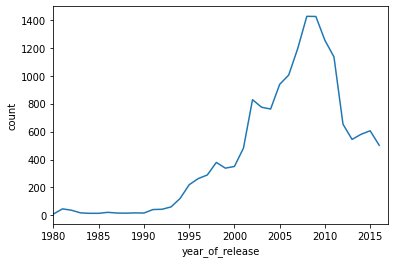

In [25]:
# посчитаем количество игр за каждый год
display(data.groupby('year_of_release')['year_of_release'].count())
data.groupby('year_of_release')['year_of_release'].count().plot(ylabel='count')
plt.xlim(1980, 2017)

До 1994 года выходило менее 100 игр в год, затем начался рост. С 2006 по 2011 наблюдается пик роста, выходило более 1000 игр каждый год. С 2012 года число игр стабилизировалось со средним значением около 550 игр в год.

### Продажи по платформам

In [26]:
# Посчитаем суммарные продажи по каждой платформе
data.pivot_table(index='platform', values='all_sales', aggfunc=sum).sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

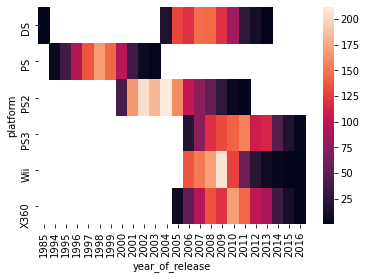

In [27]:
# построим тепловую карту для 6 платформ - лидеров продаж
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

sns.heatmap(
    data.query('platform in @top_platforms')
    .pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc=sum)
)

Средний срок "жизни" платформы составляет примерно 10 лет. Новое поколение платформ появляется каждые 5 лет.

### Выбор актуального периода

В качестве нижней границы актуального периода можно взять 2012 год. С этого года стабилизировалось число выпускаемых игр, и прошло уже 5 лет с выхода последних консолей, а значит этот период будет включать уже данные по новому поколению консолей.

In [28]:
good_data = data.query('year_of_release >= 2012')

### Потенциально прибыльные платформы

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

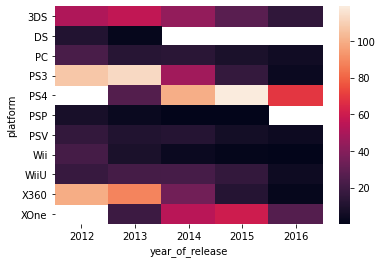

In [29]:
# Построим тепловую карту продаж платформ
sns.heatmap(
    good_data.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc=sum)
)

Выводы:
* Лидерами продаж за последние 5 лет были платформы 3DS, PS3, PS4, X360, XOne;
* Спад продаж наблюдается у платформ 3DS, PC, PS3, PSV, Wii, WiiU, X360;
* Рост демонстрируют PS4 и XOne*.

*в 2016 году у этих платформ спад, однако мы знаем, что данные за этот год могут быть неполными, а платформы демонстрировали рост в предыдущие годы. 

В качестве потенциально прибыльных платформ можно выбрать PS4 и XOne.

###  Глобальные продажи игр в разбивке по платформам

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

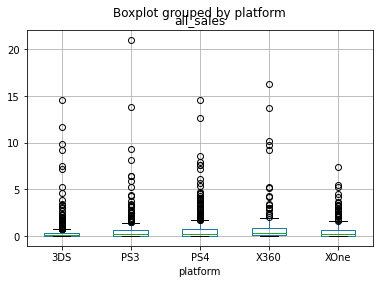

In [30]:
# построим диаграмму размаха для 5 самых продаваемых платформ
leaders = ['3DS', 'PS3', 'PS4', 'X360', 'XOne']
good_data.query('platform in @leaders').boxplot(column='all_sales', by='platform')

(0.0, 1.0)

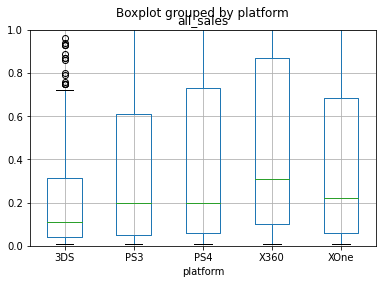

In [31]:
good_data.query('platform in @leaders').boxplot(column='all_sales', by='platform')
plt.ylim(0, 1)

Медианное значение лежит в пределах 0.2. Самый маленький разброс у DS, самый большой - у X360. Большой разброс показывает большое количество игр с аномально высокими суммарными продажами, что говорит о популярности платформы и игр на ней. 

### Влияние отзывов на продажи 

'Корреляция продаж с оценками критиков составила:'

0.3605734888507336

'Корреляция продаж с оценками пользователей составила:'

0.006163978646213326

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

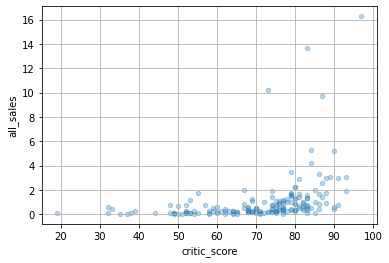

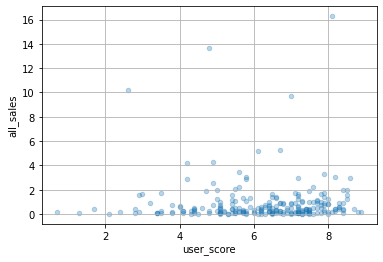

In [32]:
# возьмем самую популярную платформу за рассматриваемый период - X360
x360_critic_data = good_data.query('platform == "X360" and critic_score > 0')
x360_user_data = good_data.query('platform == "X360" and user_score > 0')

display('Корреляция продаж с оценками критиков составила:', x360_critic_data['critic_score'].corr(x360_critic_data['all_sales']))
display('Корреляция продаж с оценками пользователей составила:', x360_user_data['user_score'].corr(x360_user_data['all_sales']))

x360_critic_data.sort_values('all_sales').plot(kind='scatter', x='critic_score', y='all_sales', alpha=0.3, grid=True)
x360_user_data.sort_values('all_sales').plot(kind='scatter', x='user_score', y='all_sales', alpha=0.3, grid=True)

In [33]:
print(len(good_data.query('platform == "X360" and critic_score > 0')))
print(len(good_data.query('platform == "X360" and user_score > 0')))
print(len(good_data.query('platform == "X360" and critic_score > 0 and user_score > 0')))

171
235
171


Величина корреляции для отзывов от критиков и пользователей составила 0.36 и 0 соответственно, что говорит скорее об отсутствии взаимосвязи между оценками и продажами игры. Графики показывают, что высокие продажи могут демонстрировать игры с невысокой оценкой. Однако основная масса значений распределена равномерно. 

'3DS'

0.3208028695360785

'PS3'

0.3314972592629587

'PS4'

0.40656790206178095

'X360'

0.3605734888507336

'XOne'

0.4169983280084017

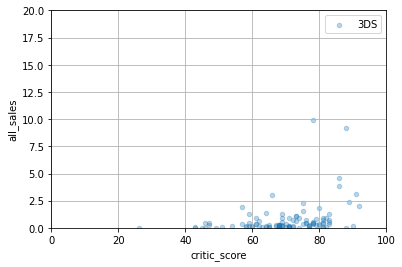

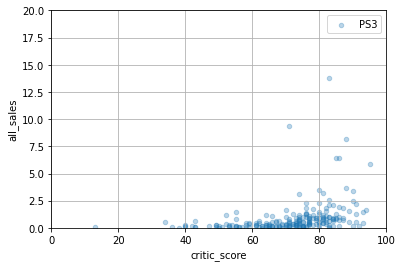

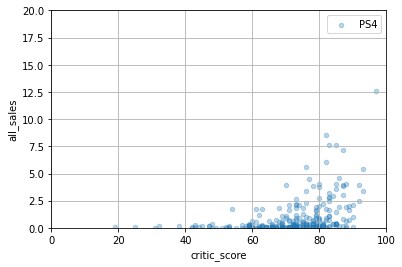

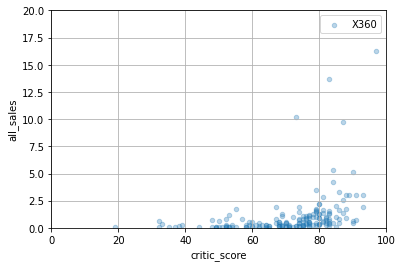

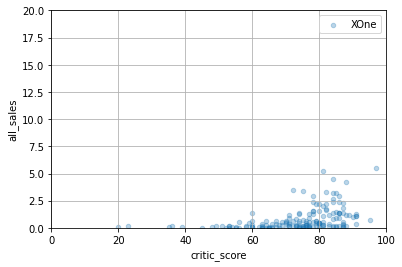

In [34]:
# проверим корреляцию оценки критиков для других платформ
for platform, platform_sales in good_data.query('platform in @leaders and critic_score > 0').groupby('platform'):
    display(platform, platform_sales['critic_score'].corr(platform_sales['all_sales']))
    platform_sales.sort_values('all_sales').plot(kind='scatter', x='critic_score', y='all_sales', alpha=0.3, label=platform, grid=True)
    plt.ylim(0, 20)
    plt.xlim(0, 100)


Все платформы демонстрируют слабую корреляцию.

### Распределение игр по жанрам

<AxesSubplot:title={'center':'all_sales'}, xlabel='genre'>

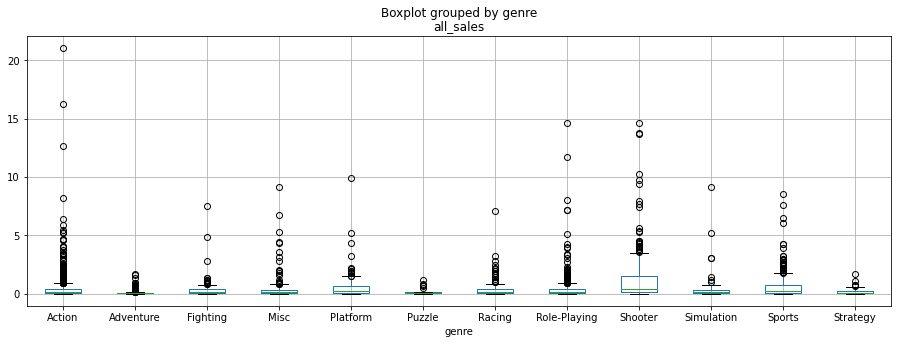

In [35]:
# Построим сводную таблицу продаж игр по жанрам и диаграмму размаха
genre_sales = good_data.pivot_table(index='genre', values='all_sales', aggfunc=['median', 'sum', 'count'])
genre_sales.columns = ['median', 'sum', 'count']
genre_sales.sort_values(by='median', ascending=False)

good_data.boxplot(column='all_sales', by='genre', figsize=(15, 5))

Самые высокие медианные продажи у жанра Shooter, затем идут Sports и Platform. Наименее популярные жанры Puzzle и Adventure. Жанр Action имеет самые высокие суммарные продажи, однако на диаграмме размаха видно, что это произошло благодаря всего трем супер популярным играм. У жанра Shooter ниже суммарные продажи, но больше игр, приносящих стабильно высокие доходы.

### Составление портрета пользователя каждого региона

**Платформы**

,eu_sales_ratio,median
platform,,
PS4,0.278383,0.08
PS3,0.210844,0.03
other_platforms,0.177815,0.19
X360,0.147034,0.10
XOne,0.101792,0.07
3DS,0.084132,0.00


,jp_sales_ratio,median
platform,,
3DS,0.455862,0.06
PS3,0.183249,0.03
PSV,0.109253,0.03
other_platforms,0.101205,0.03
PS4,0.082875,0.01
WiiU,0.067556,0.00


,median,na_sales_ratio
platform,,
X360,0.170,0.236983
PS4,0.060,0.184003
PS3,0.050,0.174933
XOne,0.120,0.157571
other_platforms,0.155,0.152918
3DS,0.000,0.093592


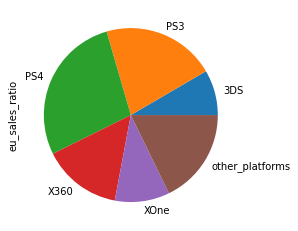

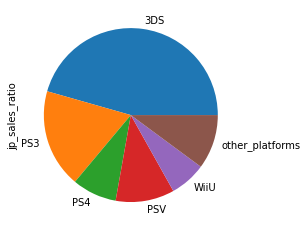

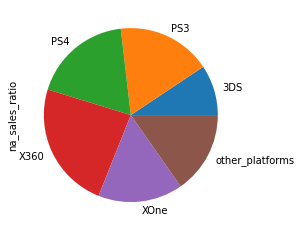

In [36]:
# Построим сводную таблицу продаж игр по платформам для каждого региона
regions_sales = ['eu_sales', 'jp_sales', 'na_sales']

for region in regions_sales:
    sales = good_data.pivot_table(index='platform', values=region, aggfunc=('sum', 'median'))
    sales = sales.reset_index()
    sales[region + '_ratio'] = sales['sum'] / sales['sum'].sum()
    ind = sales.sort_values(by=region + '_ratio', ascending=False).head()['platform']
    sales['platform'] = sales.where(sales['platform'].isin(ind), 'other_platforms')
    sales = sales.pivot_table(index='platform', values=[region + '_ratio', 'median'], aggfunc='sum')
    display(sales.sort_values(by=region + '_ratio', ascending=False))
    sales.plot(kind='pie', y=region + '_ratio', legend=False)




Выводы

* В регионе eu лидирует платформа PS4.
* В регионе jp лидирует платформа 3DS.
* В регионе na лидирует платформа X360.

В каждом регионе есть своя предпочтительная платформа.

**Жанры**

,eu_sales_ratio,median
genre,,
Action,0.314392,0.020
Shooter,0.223886,0.170
other_genres,0.175802,0.165
Sports,0.136321,0.050
Role-Playing,0.095754,0.010
Racing,0.053846,0.090


,jp_sales_ratio,median
genre,,
Role-Playing,0.339807,0.06
Action,0.274172,0.01
other_genres,0.216170,0.01
Misc,0.066777,0.02
Simulation,0.054055,0.00
Fighting,0.049019,0.03


,median,na_sales_ratio
genre,,
Action,0.02,0.300929
Shooter,0.20,0.244970
other_genres,0.18,0.143222
Sports,0.08,0.137960
Role-Playing,0.02,0.108297
Misc,0.01,0.064623


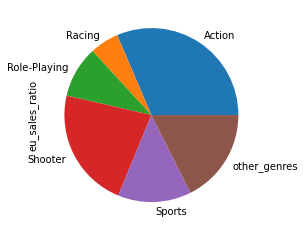

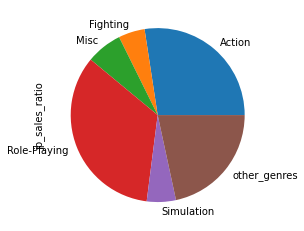

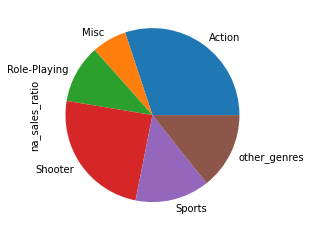

In [37]:
# Построим сводную таблицу продаж игр по жанрам для каждого региона
for region in regions_sales:
    sales = good_data.pivot_table(index='genre', values=region, aggfunc=('sum', 'median'))
    sales = sales.reset_index()
    sales[region + '_ratio'] = sales['sum'] / sales['sum'].sum()
    ind = sales.sort_values(by=region + '_ratio', ascending=False).head()['genre']
    sales['genre'] = sales.where(sales['genre'].isin(ind), 'other_genres')
    sales = sales.pivot_table(index='genre', values=[region + '_ratio', 'median'], aggfunc='sum')
    display(sales.sort_values(by=region + '_ratio', ascending=False))
    sales.plot(kind='pie', y=region + '_ratio', legend=False, normalize=False)

Выводы
* Предпочтения пользователей из eu и na практически одинаковые. Самый продаваемый жанр по медиане - Shooter, по суммарным продажам - Action.
* В регионе jp самый популярный жанр Role-Playing.

In [38]:
for region in regions_sales:
    sales = good_data.pivot_table(index='genre', values=region, aggfunc=('sum', 'median'))
    sales = sales.reset_index()

**Рейтинг ESRB**

,eu_sales_ratio
rating,
M,0.382700
E,0.223018
unknown,0.180537
E10+,0.109250
T,0.104495


,jp_sales_ratio
rating,
unknown,0.565168
E,0.147108
T,0.135113
M,0.110084
E10+,0.042528


,na_sales_ratio
rating,
M,0.391847
E,0.193529
unknown,0.174814
E10+,0.128094
T,0.111715


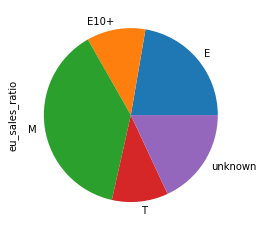

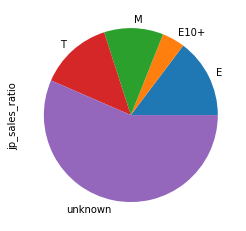

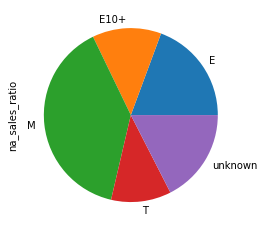

In [39]:
# Построим сводную таблицу продаж игр по рейтингу для каждого региона
for region in regions_sales:
    rating_sales = good_data.pivot_table(index='rating', values=region, aggfunc='sum')
    rating_sales[region + '_ratio'] = rating_sales[region] / rating_sales[region].sum()
    display(rating_sales[[region + '_ratio']].sort_values(by=region + '_ratio', ascending=False))
    rating_sales.plot(kind='pie', y=region + '_ratio', legend=False)

Выводы
* Самая популярная категория в регионе na M - "для взрослых".
* В регионе jp более чем у половины игр отсутствует рейтинг. 
* Рейтинг ESRB используется только в регионе na, для остальных регионов его можно не принимать во внимание  

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [40]:
# подсчитаем объемы выборок XOne и PC
display(good_data.query('platform == "XOne" and user_score > 0')['user_score'].count())
display(good_data.query('platform == "PC" and user_score > 0')['user_score'].count())

182

206

Сформулируем гипотезу. За нулевую гипотезу примем утверждение о том, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC. Альтернативной гипотезой будет утверждение о том, что средние пользовательскиие рейтинги не равны. Будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам `ttest_ind`. Так как мы знаем, что выборки разного размера (182 против 753), укажем в параметре `equal_var` значение `False`. Критический уровень статистической значимости установим в 5 %.

In [41]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    good_data.query('platform == "XOne" and user_score > 0')['user_score'], 
    good_data.query('platform == "PC" and user_score > 0')['user_score'], equal_var=False)

display('Средняя оценка XOne:',  good_data.query('platform == "XOne" and user_score > 0')['user_score'].mean())
display('Средняя оценка PC:',  good_data.query('platform == "PC" and user_score > 0')['user_score'].mean())
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'Средняя оценка XOne:'

6.521428571428572

'Средняя оценка PC:'

6.4286407766990274

'p-значение:'

0.5489537965134912

'Не получилось отвергнуть нулевую гипотезу'

**Вывод:**

Так как нулевая гипотеза отвергнута, мы принимаем альтернативную гипотезу - средний пользовательский рейтинг платформ Xbox One и PC различается. Сильное различие в средних подсказывает, в какую стророну направлено различие - среднее PC больше. 

### Средние пользовательские рейтинги жанров Action и Sports разные

In [42]:
# подсчитаем объемы выборок Action и Sports
display(good_data.query('genre == "Action" and user_score > 0')['user_score'].count())
display(good_data.query('genre == "Sports" and user_score > 0')['user_score'].count())

523

195

Сформулируем гипотезу. За нулевую гипотезу примем утверждение о том, что средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports. Альтернативной гипотезой будет утверждение о том, что средние пользовательскиие рейтинги не равны. Будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам `ttest_ind`. Так как мы знаем, что выборки разного размера (1797 против 1088), укажем в параметре `equal_var` значение `False`. Критический уровень статистической значимости установим в 5 %.

In [43]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    good_data.query('genre == "Action" and user_score > 0')['user_score'], 
    good_data.query('genre == "Sports" and user_score > 0')['user_score'], equal_var=False)

display('Средняя оценка Action:',  good_data.query('genre == "Action" and user_score > 0')['user_score'].mean())
display('Средняя оценка Sports:',  good_data.query('genre == "Sports" and user_score > 0')['user_score'].mean())
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'Средняя оценка Action:'

6.825047801147227

'Средняя оценка Sports:'

5.455897435897437

'p-значение:'

4.24307776572644e-20

'Отвергаем нулевую гипотезу'

**Вывод:**

Отвергнуть нулевую гипотезу не получилось - средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports. Средние значения подтверждают вывод.

## Общий вывод

Проведено исследование параметров, влияющих на успех продаж видеоигр. Изучены исходные данные, проведена их предобработка - изменены типы данных в колонках, отброшены артефакты. Рассчитаны дополнительные характеристики. Проведен исследовательский анализ. Проведена проверка двух гипотез. 

1. До 1994 года выходило менее 100 игр в год, затем начался рост. С 2006 по 2011 наблюдается пик роста, выходило более 1000 игр каждый год. С 2012 года число игр стабилизировалось со средним значением около 550 игр в год.

2. Средний срок "жизни" платформы составляет примерно 10 лет. Новое поколение платформ появляется каждые 5 лет.

3. В качестве периода для построения прогноза выбран период 2012-2016 гг.

4. Потенциально прибыльными платформами были выбраны PS4 и XOne.

5. Не выявлено взаимосвязи между оценками критиков и пользователей и продажами игр.

6. Самые высокие продажи у жанра Shooter.

7. Портрет пользователя региона eu: платформа - PS4, жанр - Shooter.

8. Портрет пользователя региона jp: платформа - 3DS, жанр - Role-Playing.

9. Портрет пользователя региона na: платформа - X360, жанр - Shooter, рейтинг - M.

10. Проверена гипотеза о том, что средний пользовательский рейтинг платформ Xbox One и PC одинаковый. Гипотеза не подтвердилась - среднее PC больше.

11. Проверена гипотеза о том, что средний пользовательский рейтинг жанров Action и Sports разный. Гипотеза не подтвердилась - средние значения не отличаются.


В качестве рекомендаций для планирования рекламных кампаний можно выделить следующее: 
* регион eu: платформа - PS4, жанр - Shooter;
* регион jp: платформа - PS4, жанр - Role-Playing;
* регион na: платформа - XOne, жанр - Shooter, рейтинг - M.
